## Assignment 3 - Model - Group 28

In [46]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

### Collecting the data

In [2]:
# Importing Dataset

data = pd.read_csv("recruitmentdataset-2022-1.3.csv")

### Describing the data

In [3]:
# Filtering the dataset to Company A and Swimming, Golf & Football sports only

filtered_df = data[data['company']=='A']
filtered_df = filtered_df[filtered_df['sport'].str.contains('Swimming|Golf|Football', case=False)]
filtered_df.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True
10,x9775f,female,27,Dutch,Football,61,False,False,False,False,1,True,bachelor,A,False
11,x3562f,male,28,Dutch,Football,56,False,False,False,True,2,False,bachelor,A,True
12,x4044c,female,27,German,Football,62,False,True,False,False,1,True,bachelor,A,False
13,x9428d,male,26,Dutch,Football,56,False,False,False,False,1,False,bachelor,A,False


In [4]:
filtered_df.shape

(492, 15)

In [5]:
filtered_df.describe()

,age,ind-university_grade,ind-languages
count,492.000000,492.000000,492.000000
mean,26.247967,61.833333,1.392276
std,2.602579,5.853321,0.848253
min,21.000000,47.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,66.000000,2.000000
max,32.000000,77.000000,3.000000


In [6]:
sport_counts = filtered_df['sport'].value_counts()
sport_counts

Football    243
Swimming    163
Golf         86
Name: sport, dtype: int64

In [7]:
nationality_counts = filtered_df['nationality'].value_counts()
nationality_counts

Dutch      367
German      68
Belgian     57
Name: nationality, dtype: int64

In [8]:
hired_counts = filtered_df['decision'].value_counts()
hired_counts

False    277
True     215
Name: decision, dtype: int64

In [9]:
degree_counts = filtered_df['ind-degree'].value_counts()
degree_counts

bachelor    260
master      205
phd          27
Name: ind-degree, dtype: int64

In [10]:
gender_counts = filtered_df['gender'].value_counts()
gender_counts

male      267
female    217
other       8
Name: gender, dtype: int64

In [11]:
languages_counts = filtered_df['ind-languages'].value_counts()
languages_counts

1    210
2    164
0     69
3     49
Name: ind-languages, dtype: int64

### Exploring the data
**the bar charts that were chosen for the presentation**

In [12]:
df = filtered_df

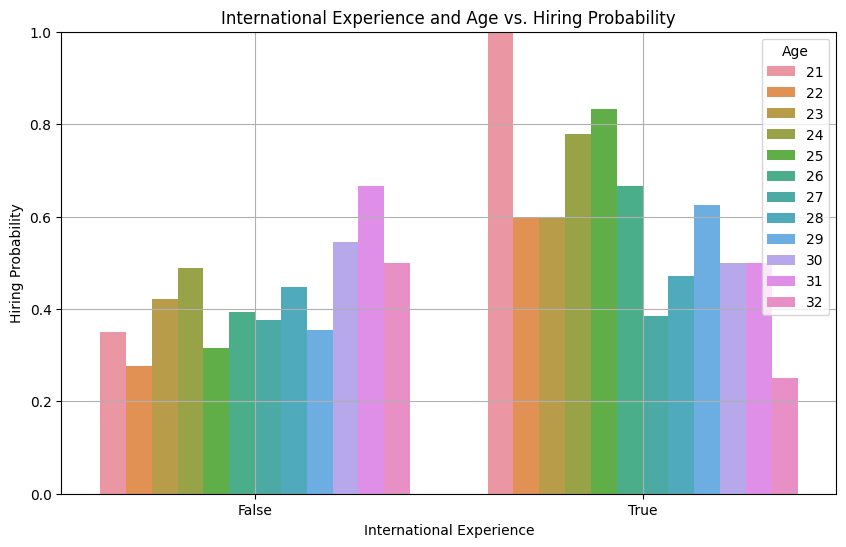

In [13]:
hired_probability = df.groupby(['ind-international_exp', 'age'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-international_exp', y='decision', hue='age', data=hired_probability)
plt.title('International Experience and Age vs. Hiring Probability')
plt.xlabel('International Experience')
plt.ylabel('Hiring Probability')
plt.legend(title='Age', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

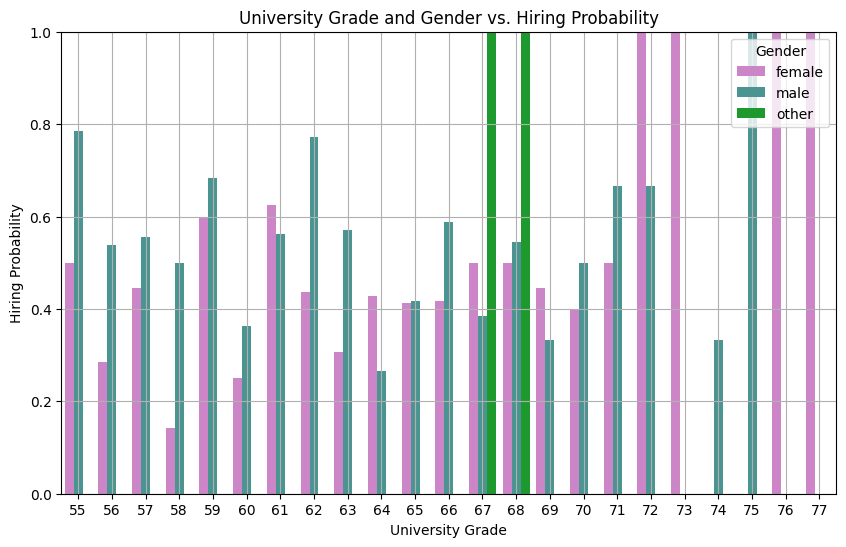

In [14]:
filtered_df1 = df[df['ind-university_grade'] >= 55]
hired_probability = filtered_df1.groupby(['ind-university_grade', 'gender'])['decision'].mean().reset_index()
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-university_grade', y='decision', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('University Grade and Gender vs. Hiring Probability')
plt.xlabel('University Grade')
plt.ylabel('Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

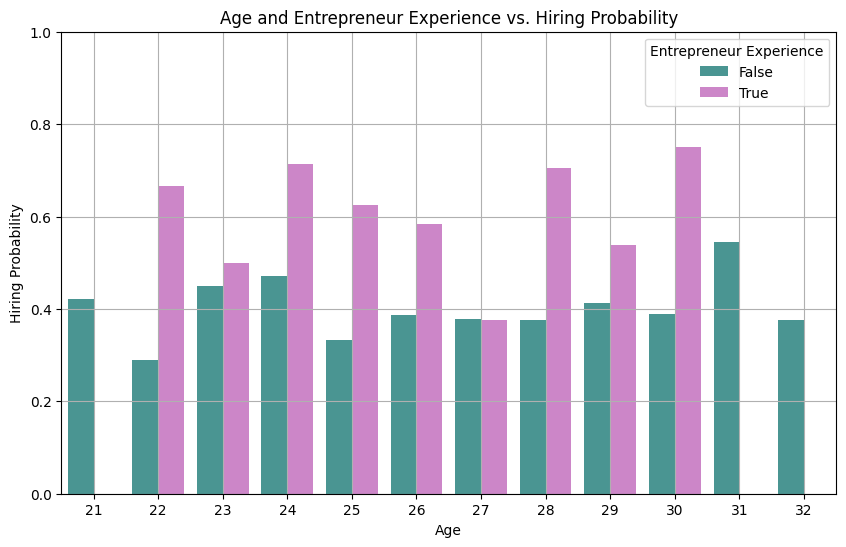

In [15]:
hired_probability = df.groupby(['age', 'ind-entrepeneur_exp'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = ['#3EA19E', '#D87AD3']
sns.barplot(x='age', y='decision', hue='ind-entrepeneur_exp', data=hired_probability, palette=custom_palette)
plt.title('Age and Entrepreneur Experience vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Entrepreneur Experience', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

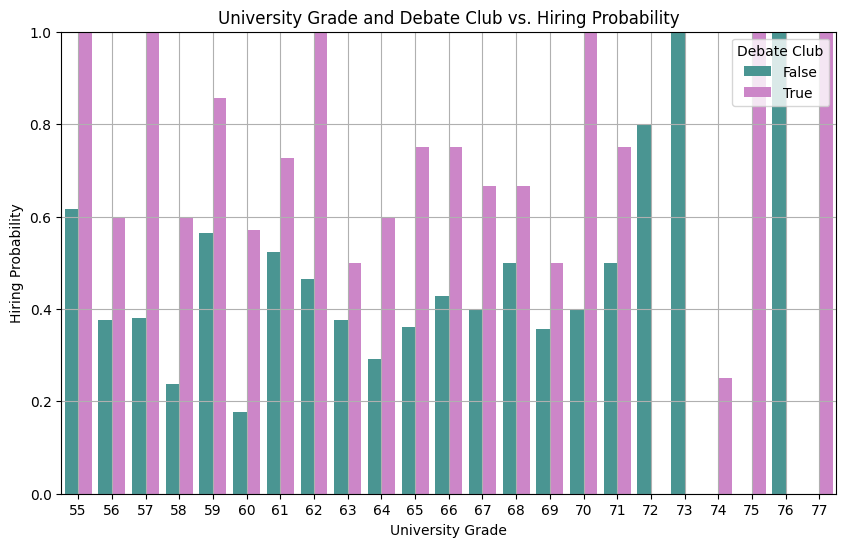

In [16]:
filtered_df1 = df[df['ind-university_grade'] >= 55]
hired_probability = filtered_df1.groupby(['ind-debateclub', 'ind-university_grade'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = ['#3EA19E', '#D87AD3']
sns.barplot(x='ind-university_grade', y='decision', hue='ind-debateclub', data=hired_probability, palette=custom_palette)
plt.title('University Grade and Debate Club vs. Hiring Probability')
plt.xlabel('University Grade')
plt.ylabel('Hiring Probability')
plt.legend(title='Debate Club', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

**the other bar charts**

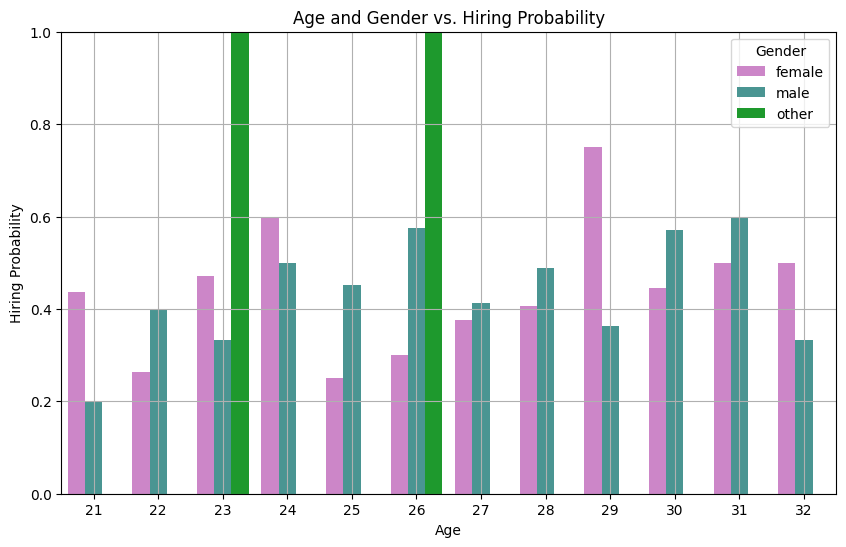

In [17]:
hired_probability = df.groupby(['age', 'gender'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
sns.barplot(x='age', y='decision', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('Age and Gender vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

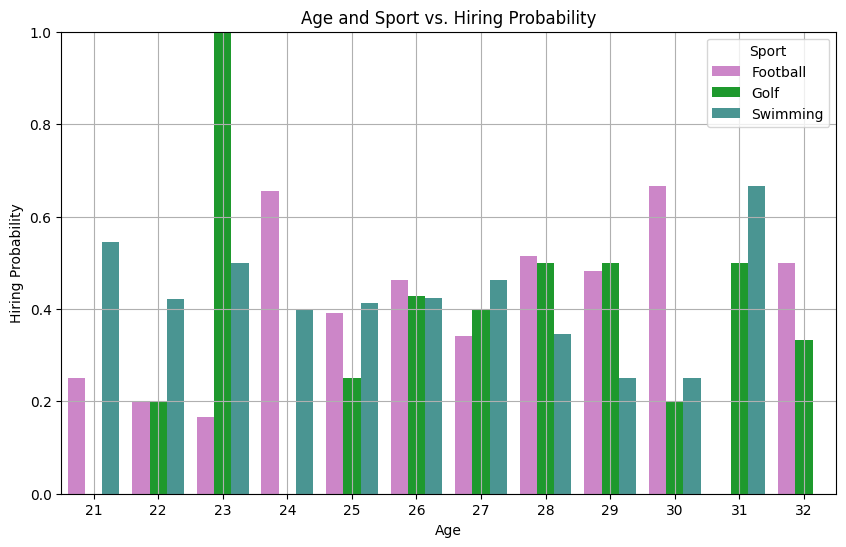

In [18]:
hired_probability = df.groupby(['age', 'sport'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'Swimming': '#3EA19E', 'Football': '#D87AD3', 'Golf': '#09AD1D'}
sns.barplot(x='age', y='decision', hue='sport', data=hired_probability, palette=custom_palette)
plt.title('Age and Sport vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Sport', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

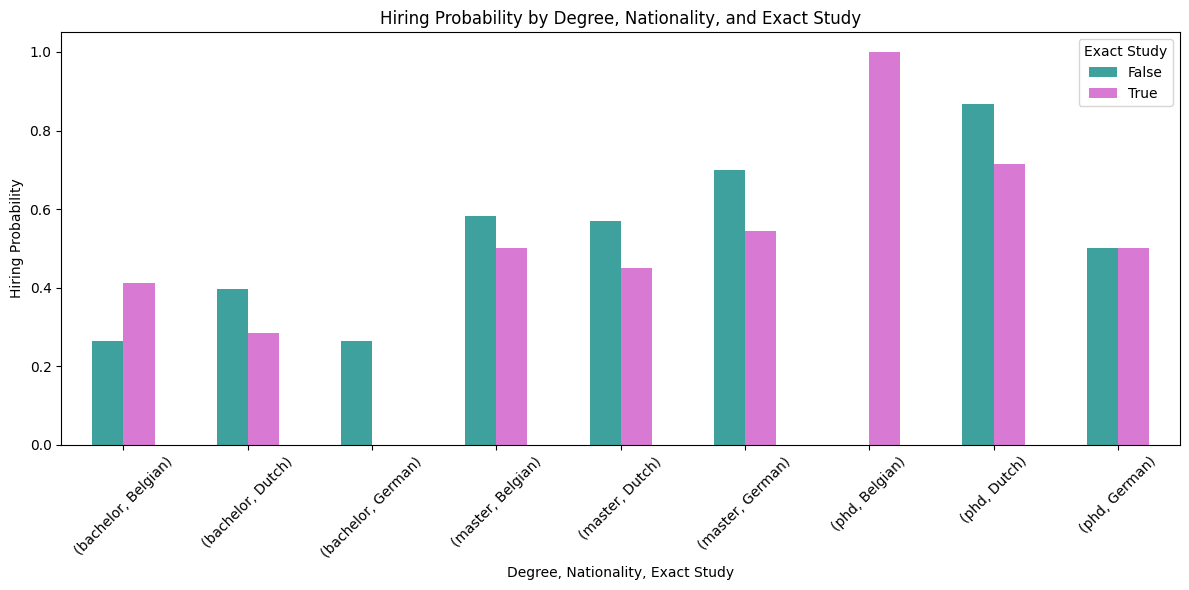

In [19]:
grouped = df.groupby(['ind-degree', 'nationality', 'ind-exact_study'])['decision'].mean().unstack()

colors = ["#3EA19E", "#D87AD3"]

fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', ax=ax, color=colors)
plt.xlabel('Degree, Nationality, Exact Study')
plt.ylabel('Hiring Probability')
plt.title('Hiring Probability by Degree, Nationality, and Exact Study')
plt.xticks(rotation=45)
plt.legend(title='Exact Study', labels=['False', 'True'])
plt.tight_layout()
plt.show()

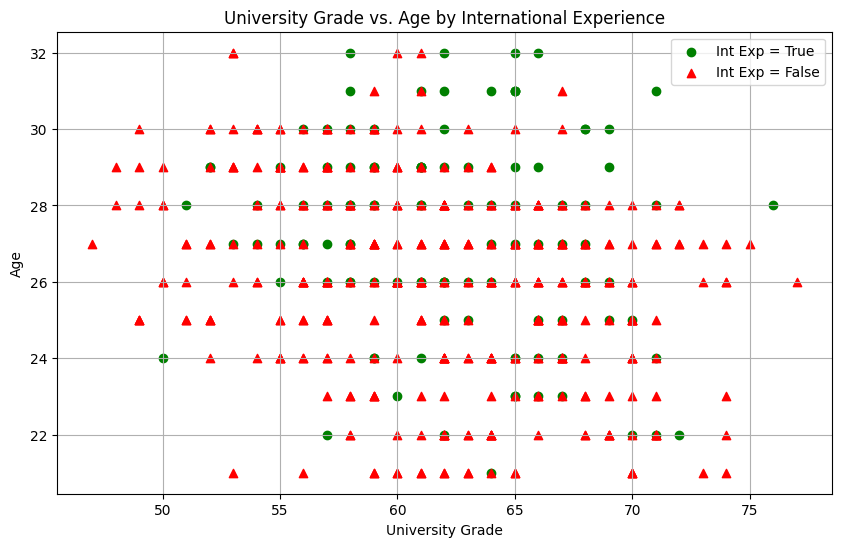

In [20]:
# Scatterplot illustrating the university grade by age distributing, marking the presence or lack of international experience. 
plt.figure(figsize=(10, 6))

# For ind-international_exp == True
plt.scatter(df[df['ind-international_exp'] == True]['ind-university_grade'],
            df[df['ind-international_exp'] == True]['age'],
            label='Int Exp = True', marker='o', color='green')

# For ind-international_exp == False
plt.scatter(df[df['ind-international_exp'] == False]['ind-university_grade'],
            df[df['ind-international_exp'] == False]['age'],
            label='Int Exp = False', marker='^', color='red')

plt.xlabel('University Grade')
plt.ylabel('Age')
plt.title('University Grade vs. Age by International Experience')
plt.legend()
plt.grid(True)

plt.show()

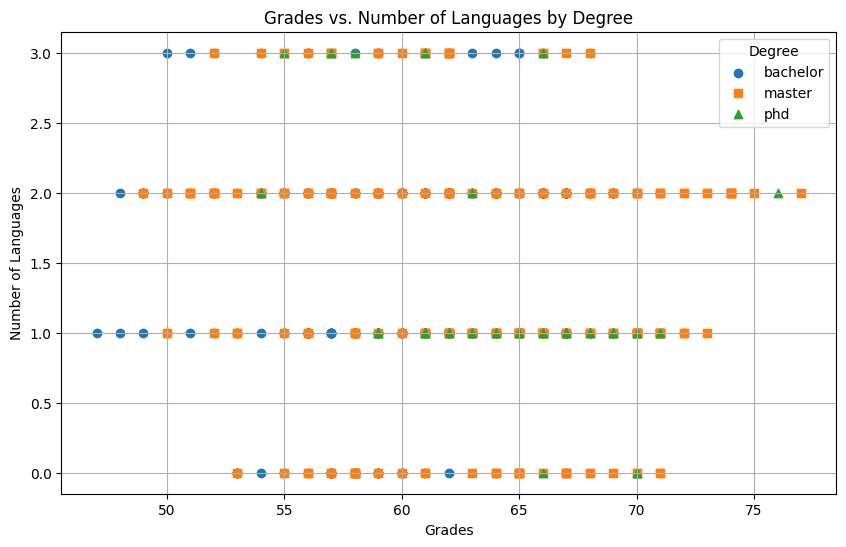

In [21]:
# Scatterplot illustrating the university grades by number of languages, marking type of degree.  
degree_markers = {
    'bachelor': 'o',
    'master': 's',
    'phd': '^'}

plt.figure(figsize=(10, 6))

for degree, marker in degree_markers.items():
    degree_data = df[df['ind-degree'] == degree]
    plt.scatter(degree_data['ind-university_grade'], degree_data['ind-languages'], label=degree, marker=marker)

plt.xlabel('Grades')
plt.ylabel('Number of Languages')
plt.title('Grades vs. Number of Languages by Degree')
plt.legend(title='Degree')
plt.grid(True)
plt.show()

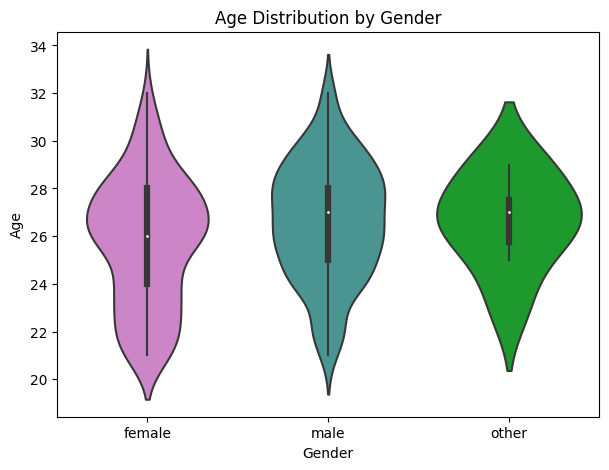

   Gender   Min Age   Max Age   Mean Age   Median Age
0  female        21        32         26           26
1    male        21        32         27           27
2   other        23        29         27           27


In [22]:
#Violin plot illustrating age distribution by gender.

plt.figure(figsize=(7, 5))
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
sns.violinplot(x='gender', y='age', data=df, palette=custom_palette)

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

# Table to display the results
min_max_values = df.groupby('gender')['age'].agg(['min', 'max', 'mean', 'median']).reset_index()
min_max_values['mean'] = min_max_values['mean'].round().astype(int)  # Round mean to integer
min_max_values['median'] = min_max_values['median'].astype(int)  # Ensure median is integer
min_max_table = pd.DataFrame({
    'Gender': min_max_values['gender'],
    ' Min Age': min_max_values['min'],
    ' Max Age': min_max_values['max'],
    ' Mean Age': min_max_values['mean'],
    ' Median Age': min_max_values['median']})

print(min_max_table)

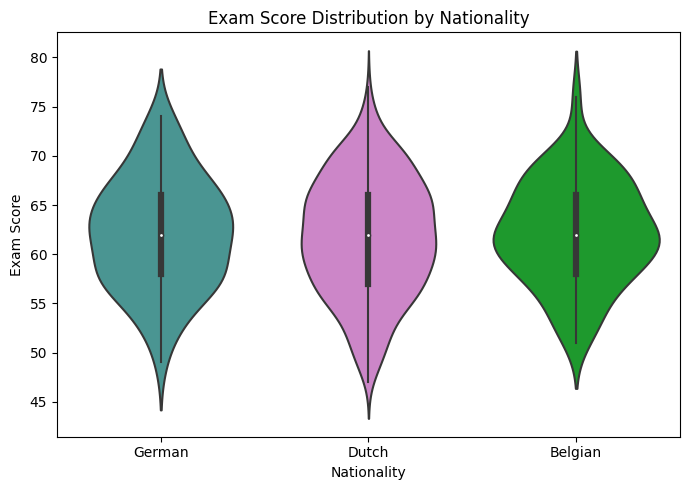

  Nationality  Minimal Score  Maximal Score  Mean Score  Median Score
0     Belgian             51             76          62          62.0
1       Dutch             47             77          62          62.0
2      German             49             74          62          62.0


In [23]:
#Violet plot showing the diversity of exam scores by nationality.
plt.figure(figsize=(7, 5))
custom_palette = {'German': '#3EA19E', 'Dutch': '#D87AD3', 'Belgian': '#09AD1D'}
sns.violinplot(x='nationality', y='ind-university_grade', data=df, palette=custom_palette)

plt.xlabel('Nationality')
plt.ylabel('Exam Score')
plt.title('Exam Score Distribution by Nationality')
plt.xticks #(rotation=45) 
plt.tight_layout()
plt.show()

# Table
min_max_values_nationality = df.groupby('nationality')['ind-university_grade'].agg(['min', 'max', 'mean', 'median']).reset_index()
min_max_values_nationality.columns = ['Nationality', 'Minimal Score', 'Maximal Score', 'Mean Score', 'Median Score']
min_max_values_nationality['Mean Score'] = min_max_values_nationality['Mean Score'].round().astype(int)  


print(min_max_values_nationality)

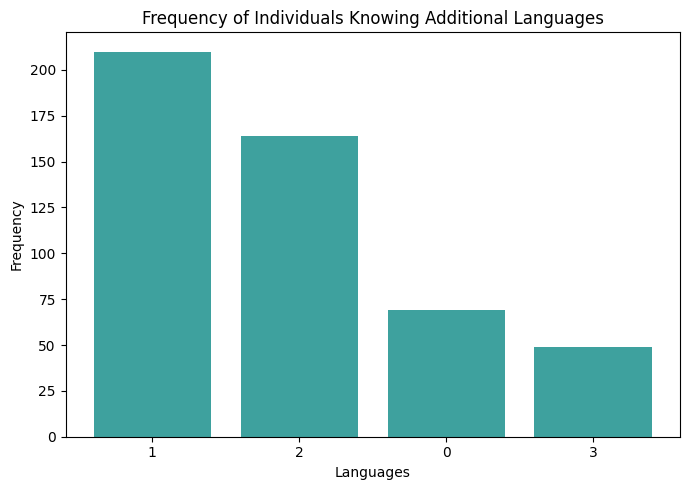

   Languages  Frequency
0          1        210
1          2        164
2          0         69
3          3         49


In [24]:
#Histogram visualizing the frequency of individuals knowing additional languages (aside from their native language)

language_counts = df['ind-languages'].value_counts()
languages = language_counts.index
frequencies = language_counts.values

plt.figure(figsize=(7, 5)) 
plt.bar(range(len(languages)), frequencies, color='#3EA19E')
plt.xticks(range(len(languages)), [int(label) for label in languages])

plt.xlabel('Languages')
plt.ylabel('Frequency')

plt.title('Frequency of Individuals Knowing Additional Languages')
plt.tight_layout() 
plt.show()

#Table:
language_table = pd.DataFrame({'Languages': languages, 'Frequency': frequencies})
print(language_table)

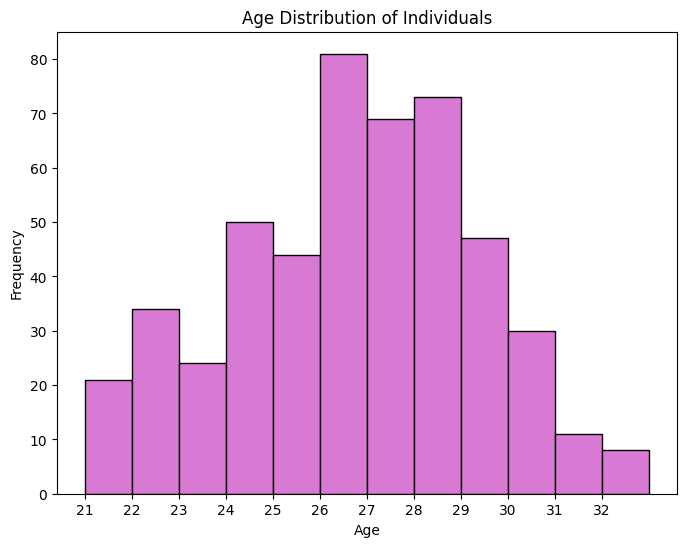

    Age  Number of people
9    21                21
6    22                34
8    23                24
3    24                50
5    25                44
0    26                81
2    27                69
1    28                73
4    29                47
7    30                30
10   31                11
11   32                 8


In [25]:
# Histogram illustating the age distribution frequency.

unique_ages = sorted(df['age'].unique())
plt.figure(figsize=(8, 6))  
age_bins = unique_ages + [unique_ages[-1] + 1]
plt.hist(df['age'], bins=age_bins, edgecolor='k', color='#D87AD3')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(unique_ages)

plt.title('Age Distribution of Individuals')
plt.show()

#Table
age_counts = df['age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Number of people']
age_counts = age_counts.sort_values(by='Age')
print(age_counts)

### Preparing the data

In [26]:
# Checking for missing values 
missing_values = df.isnull().sum()
print("Missing values count for each column:")
print(missing_values)

# Checking for duplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Cheking for outliers
numeric_columns = df.select_dtypes(include=[int, float])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any()
print("\nOutliers:")
print(outliers)

Missing values count for each column:
Id                       0
gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [Id, gender, age, nationality, sport, ind-university_grade, ind-debateclub, ind-programming_exp, ind-international_exp, ind-entrepeneur_exp, ind-languages, ind-exact_study, ind-degree, company, decision]
Index: []

Outliers:
age                     False
ind-university_grade    False
ind-languages           False
dtype: bool


### Modelling the data

**Decision Tree Model**

In [27]:
# Splitting the data in train, test and validation data

df_train, df_test = skl.model_selection.train_test_split(filtered_df, test_size=0.20, random_state=9, shuffle=True)
df_train.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
510,x7641d,female,27,Dutch,Football,63,False,False,False,False,1,True,master,A,False
204,x1289g,female,27,Dutch,Football,70,False,True,False,False,1,True,master,A,False
377,x4495f,male,29,German,Football,57,False,False,True,True,2,False,master,A,True
481,x6270e,male,27,Dutch,Swimming,68,False,True,False,False,1,True,bachelor,A,False
357,x9704c,male,31,German,Golf,58,False,False,True,False,0,False,master,A,False


In [28]:
# Splitting x and y for train, test and validation data

X_train = df_train[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree']]
y_train = df_train['decision']
X_test = df_test[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp',	'ind-languages', 'ind-exact_study',	'ind-degree']]
y_test = df_test['decision']

In [29]:
# Define preprocessing steps
categorical_features = ['sport', 'ind-degree', 'ind-programming_exp', 'ind-languages']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['ind-university_grade']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

In [30]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ind-university_grade']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sport', 'ind-degree',
                                                   'ind-programming_exp',
                                                   'ind-languages'])])),
                ('classifier', DecisionTreeClassifier())])

In [31]:
# Define hyperparameters to search
dt_param_grid = {
    'classifier__max_depth': np.arange(2, 15),
    'classifier__min_samples_split': np.arange(2, 15)  ,
    'classifier__min_samples_leaf': np.arange(2, 15),
}

# Create a grid search with cross-validation
dt_grid_search = GridSearchCV(decision_tree_pipeline, dt_param_grid, cv=5, scoring='f1')
dt_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
dt_best_params = dt_grid_search.best_params_
dt_best_classifier = dt_grid_search.best_estimator_.named_steps['classifier']
print(dt_best_classifier)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)


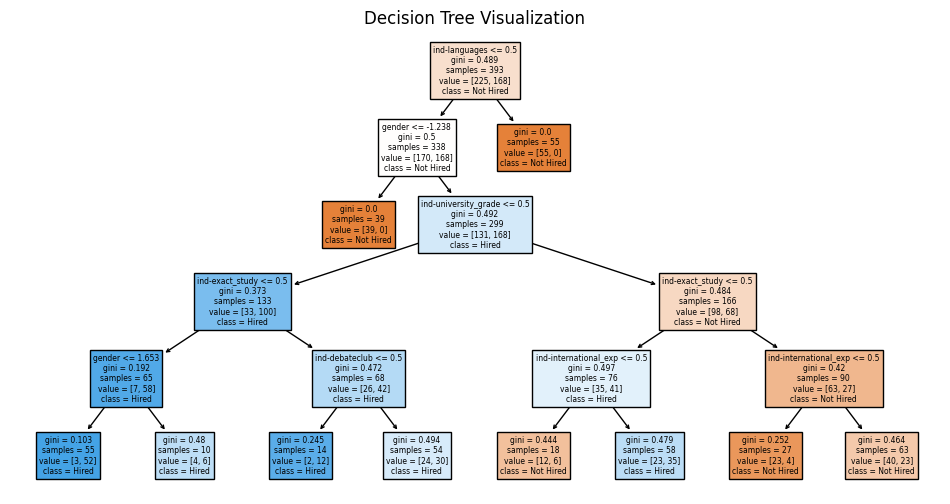

In [47]:
plt.figure(figsize=(12, 6))
plot_tree(dt_best_classifier, filled=True, feature_names=X_train.columns, class_names=['Not Hired', 'Hired'])
plt.title("Decision Tree Visualization")
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.75      0.79       225
        True       0.71      0.80      0.75       168

    accuracy                           0.77       393
   macro avg       0.77      0.78      0.77       393
weighted avg       0.78      0.77      0.77       393

Precision: 0.71
Recall: 0.80
F1-score: 0.75


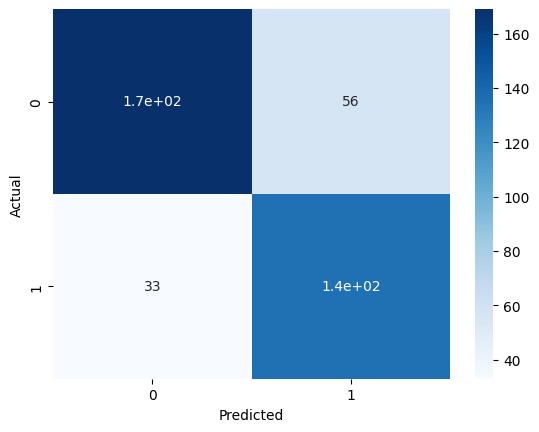

In [32]:
# Make predictions on the training set
y_pred = dt_grid_search.predict(X_train)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_train, y_pred))

conf_matrix = confusion_matrix(y_train, y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

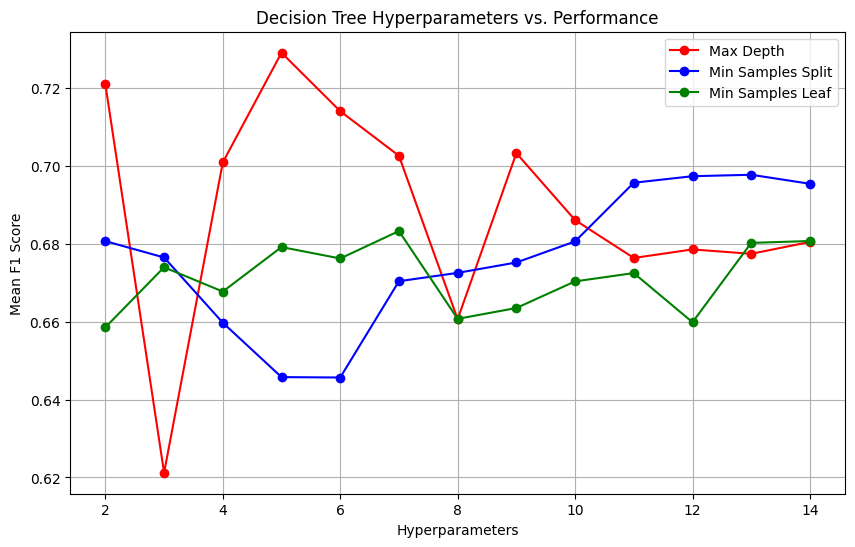

In [33]:
# Define a range of maximum depths to test
parameters_range = np.arange(2, 15)
mean_scores_depth = []
# Iterate over different maximum depths
for depth in parameters_range:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_depth.append(mean_score)

mean_scores_samples = []
# Iterate over different number of samples
for samples in parameters_range:
    # Create a decision tree classifier with the current samples
    classifier = DecisionTreeClassifier(min_samples_split=samples, random_state=42)
    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_samples.append(mean_score)

mean_scores_leaves = []

# Iterate over different maximum depths
for depth in parameters_range:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(min_samples_leaf=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_leaves.append(mean_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(parameters_range, mean_scores_depth, marker='o', linestyle='-', color='red', label='Max Depth')
plt.plot(parameters_range, mean_scores_samples, marker='o', linestyle='-', color='blue', label='Min Samples Split')
plt.plot(parameters_range, mean_scores_leaves, marker='o', linestyle='-', color='green', label='Min Samples Leaf')
plt.title('Decision Tree Hyperparameters vs. Performance')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean F1 Score')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.73      0.75        52
        True       0.72      0.77      0.74        47

    accuracy                           0.75        99
   macro avg       0.75      0.75      0.75        99
weighted avg       0.75      0.75      0.75        99

Precision: 0.72
Recall: 0.77
F1-score: 0.74


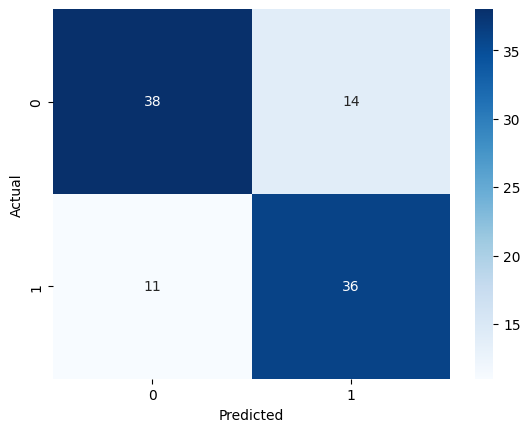

In [34]:
# Make predictions on the test set
dt_y_pred = dt_grid_search.predict(X_test)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

conf_matrix = confusion_matrix(y_test, dt_y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression Model**

In [35]:
logistic_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

In [36]:
logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ind-university_grade']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sport', 'ind-degree',
                                                   'ind-programming_exp',
                                                   'ind-languages'])])),
                ('classifier', LogisticRegression())])

In [37]:
# Define hyperparameters to search
lr_param_grid = {
    'classifier__C': [0.1, 1, 10, 15, 25],  # Regularization parameter
    'classifier__n_jobs': [1,2,3,4,5],
}

# Create a grid search with cross-validation
lr_grid_search = GridSearchCV(logistic_regression_pipeline, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
lr_best_params = lr_grid_search.best_params_
lr_best_classifier = lr_grid_search.best_estimator_.named_steps['classifier']
print(lr_best_classifier)

LogisticRegression(C=1, n_jobs=1)


Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.80      0.79       225
        True       0.72      0.68      0.70       168

    accuracy                           0.75       393
   macro avg       0.75      0.74      0.75       393
weighted avg       0.75      0.75      0.75       393

Precision: 0.72
Recall: 0.68
F1-score: 0.70


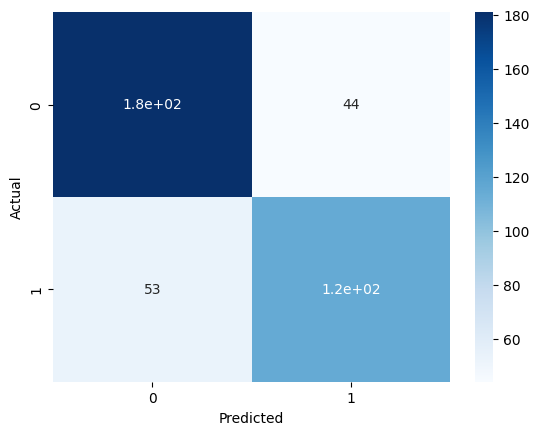

In [38]:
# Make predictions on the training set
lr_y_pred = lr_grid_search.predict(X_train)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_train, lr_y_pred))

conf_matrix = confusion_matrix(y_train, lr_y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_train, lr_y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
regularization_params = [0.1, 1, 10, 15, 25]
n_jobs_params = [1,2,3,4,5]

mean_scores_regularization = []
# Iterate over different maximum depths
for i in regularization_params:
    # Create a decision tree classifier with the current depth
    classifier = LogisticRegression(C=i, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_regularization.append(mean_score)

mean_scores_n_jobs = []
# Iterate over different number of samples
for i in n_jobs_params:
    # Create a decision tree classifier with the current samples
    classifier = LogisticRegression(n_jobs=i, random_state=42)
    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_n_jobs.append(mean_score)


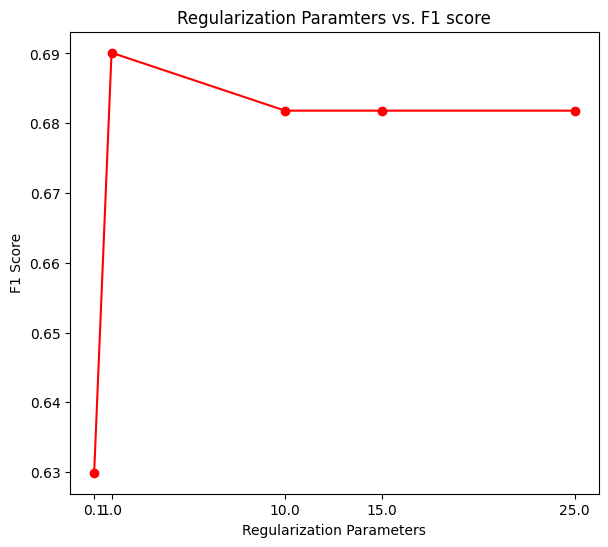

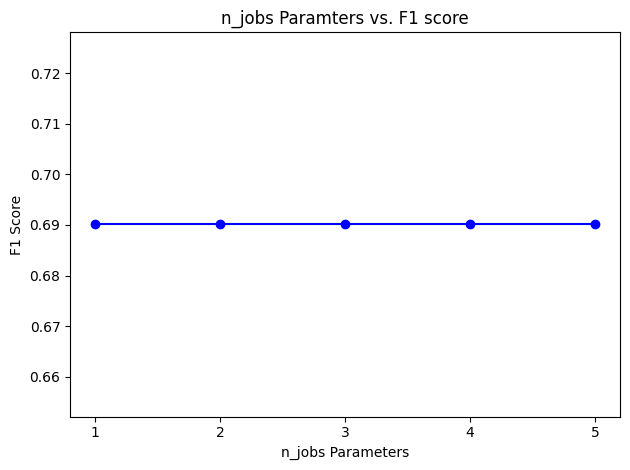

In [40]:
plt.figure(figsize=(15, 6))  # Increase the figure width

# Plot for C values
plt.subplot(1, 2, 1)  # Create a subplot for C values
plt.plot(regularization_params, mean_scores_regularization, marker='o', linestyle='-', color='red')
plt.xticks(regularization_params)
plt.title('Regularization Paramters vs. F1 score')
plt.xlabel('Regularization Parameters')
plt.ylabel('F1 Score')
plt.show()

# Plot for n_jobs values
plt.subplot(1, 1, 1)  # Create a subplot for C values
plt.plot(n_jobs_params, mean_scores_n_jobs, marker='o', linestyle='-', color='blue')
plt.xticks(n_jobs_params)
plt.title('n_jobs Paramters vs. F1 score')
plt.xlabel('n_jobs Parameters')
plt.ylabel('F1 Score')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.79      0.75        52
        True       0.73      0.64      0.68        47

    accuracy                           0.72        99
   macro avg       0.72      0.71      0.71        99
weighted avg       0.72      0.72      0.72        99

Precision: 0.73
Recall: 0.64
F1-score: 0.68


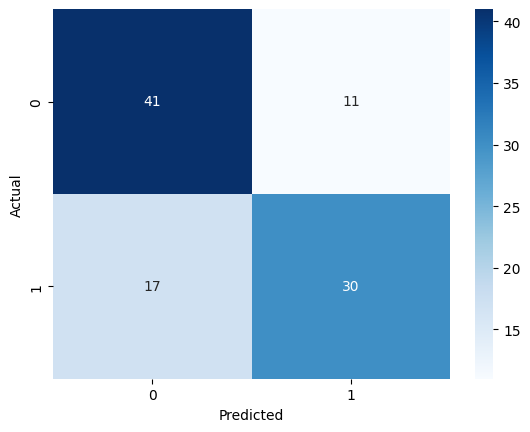

In [41]:
# Make predictions on the test set
lr_y_pred = lr_grid_search.predict(X_test)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

conf_matrix = confusion_matrix(y_test, lr_y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_test, lr_y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Support Vector Machines Model**

In [42]:
# Define preprocessing steps
categorical_features = ['sport', 'ind-degree', 'ind-programming_exp', 'ind-languages']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['ind-university_grade']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Replace 'DecisionTreeClassifier' with 'SVC' for SVM
from sklearn.svm import SVC

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])  # Change the classifier here to use SVC

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ind-university_grade']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sport', 'ind-degree',
                                                   'ind-programming_exp',
                                                   'ind-languages'])])),
                ('classifier', SVC())])

Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.80      0.79       225
        True       0.72      0.68      0.70       168

    accuracy                           0.75       393
   macro avg       0.75      0.74      0.74       393
weighted avg       0.75      0.75      0.75       393



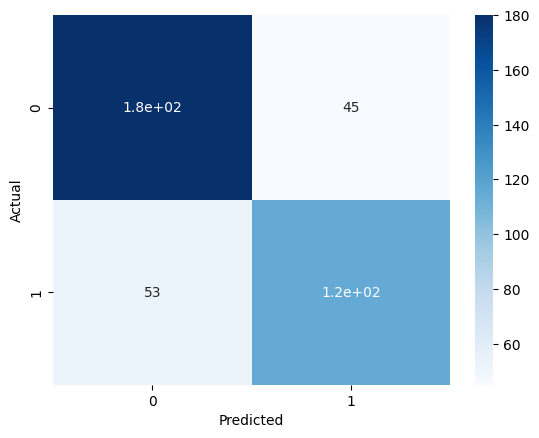

In [43]:
# Define hyperparameters for SVM
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': [0.1, 1],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = grid_search.predict(X_train)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report for Test Set:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85        52
        True       0.83      0.83      0.83        47

    accuracy                           0.84        99
   macro avg       0.84      0.84      0.84        99
weighted avg       0.84      0.84      0.84        99



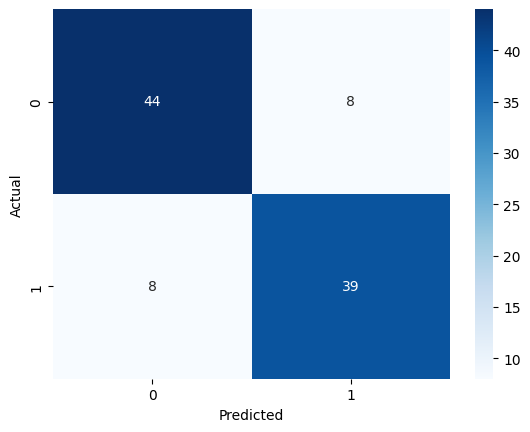

In [44]:
# Make predictions on the test set
grid_search.fit(X_test, y_test)
y_test_pred = grid_search.predict(X_test)

# Generate a classification report for the validation set
from sklearn.metrics import classification_report
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate and display a confusion matrix for the validation set
from sklearn.metrics import confusion_matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define a range of hyperparameter values to test
C_values = [0.1, 1, 10]
kernels = ['linear', 'rbf']
gamma_values = [0.1, 1]

# Initialize lists to store mean cross-validation scores for each hyperparameter value
mean_scores_C = []
mean_scores_kernel = []
mean_scores_gamma = []

# Iterate over different C values
for C in C_values:
    classifier = SVC(C=C, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Compute the mean score for this C value
    mean_score = np.mean(scores)
    mean_scores_C.append(mean_score)

# Iterate over different kernel values
for kernel in kernels:
    classifier = SVC(kernel=kernel, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Compute the mean score for this kernel value
    mean_score = np.mean(scores)
    mean_scores_kernel.append(mean_score)

# Iterate over different gamma values
for gamma in gamma_values:
    classifier = SVC(gamma=gamma, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Compute the mean score for this gamma value
    mean_score = np.mean(scores)
    mean_scores_gamma.append(mean_score)

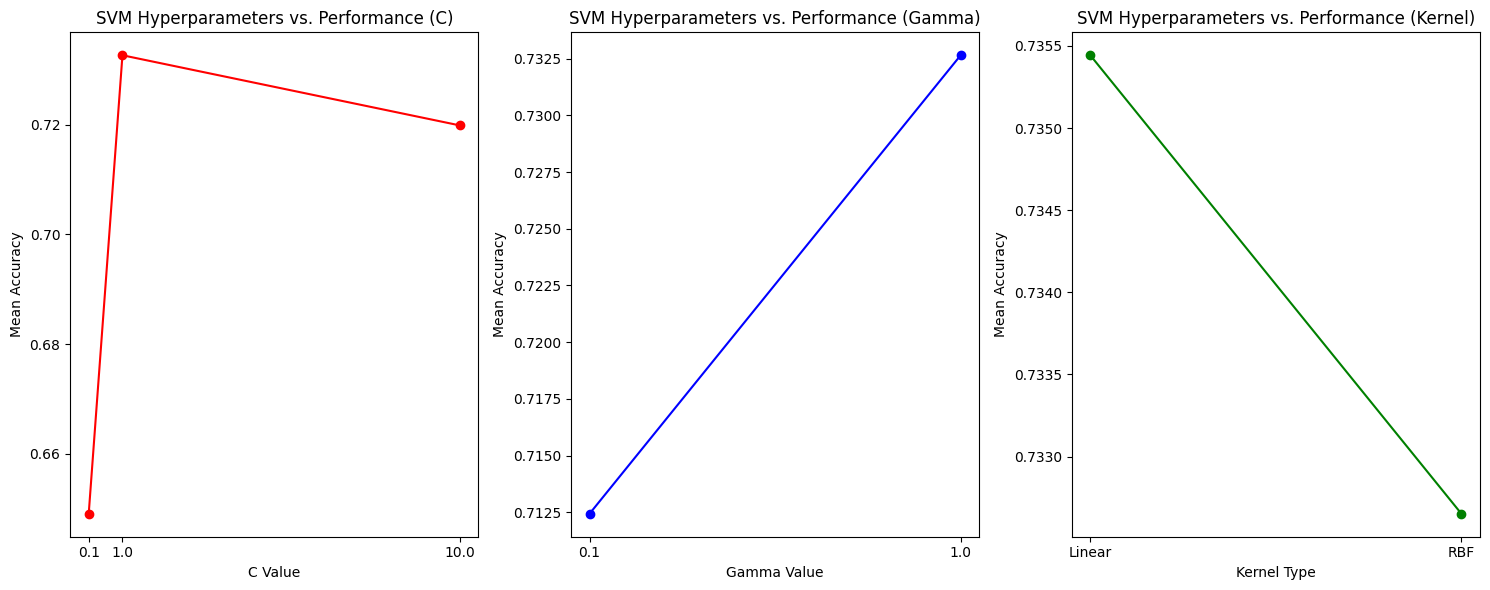

In [58]:
plt.figure(figsize=(15, 6))  # Increase the figure width

# Plot for C values
plt.subplot(1, 3, 1)  # Create a subplot for C values
plt.plot(C_values, mean_scores_C, marker='o', linestyle='-', color='red')
plt.xticks(C_values)
plt.title('SVM Hyperparameters vs. Performance (C)')
plt.xlabel('C Value')
plt.ylabel('Mean Accuracy')

# Plot for gamma values
plt.subplot(1, 3, 2)  # Create a subplot for gamma values
plt.plot(gamma_values, mean_scores_gamma, marker='o', linestyle='-', color='blue')
plt.xticks(gamma_values)
plt.title('SVM Hyperparameters vs. Performance (Gamma)')
plt.xlabel('Gamma Value')
plt.ylabel('Mean Accuracy')

# Plot for kernel values (linear vs. rbf)
plt.subplot(1, 3, 3)  # Create a subplot for kernel types
plt.plot(['Linear', 'RBF'], mean_scores_kernel, marker='o', linestyle='-', color='green')
plt.title('SVM Hyperparameters vs. Performance (Kernel)')
plt.xlabel('Kernel Type')
plt.ylabel('Mean Accuracy')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


*Changes made based on the results from plots*

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.84      0.84       225
        True       0.78      0.77      0.78       168

    accuracy                           0.81       393
   macro avg       0.81      0.81      0.81       393
weighted avg       0.81      0.81      0.81       393



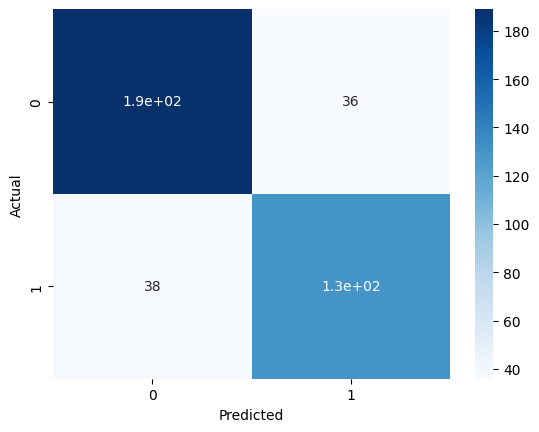

In [59]:
param_grid = {
    'classifier__C': [1, 10],  # Adjusted C values based on insights
    'classifier__kernel': ['rbf'],  # Based on insights, use RBF kernel
    'classifier__gamma': [1],  # Adjusted gamma based on insights
}
# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = grid_search.predict(X_train)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report for Test Set:
              precision    recall  f1-score   support

       False       0.87      0.92      0.90        52
        True       0.91      0.85      0.88        47

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99



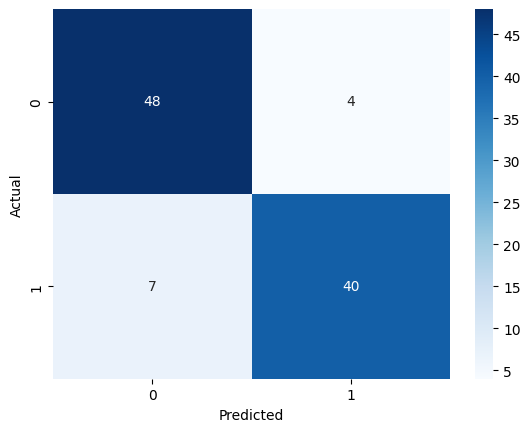

In [60]:
# Make predictions on the test set
grid_search.fit(X_test, y_test)
y_test_pred = grid_search.predict(X_test)

# Generate a classification report for the validation set
from sklearn.metrics import classification_report
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate and display a confusion matrix for the validation set
from sklearn.metrics import confusion_matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Final Model Explorations

**Getting the test data**

In [78]:
# The Real Data

X_test["age group"] = pd.cut(X_test['age'], [20,23,26,29,32]).astype(str)
X_test["real"] = y_test

# The Predicted Values
X_test["decision-tree"] = dt_y_pred
X_test["logistic-regression"] = lr_y_pred
X_test["svm"] = y_test_pred

**Final Model Exploration for the Decision Tree model**

*1.1. Model Performance Metrics Tables*

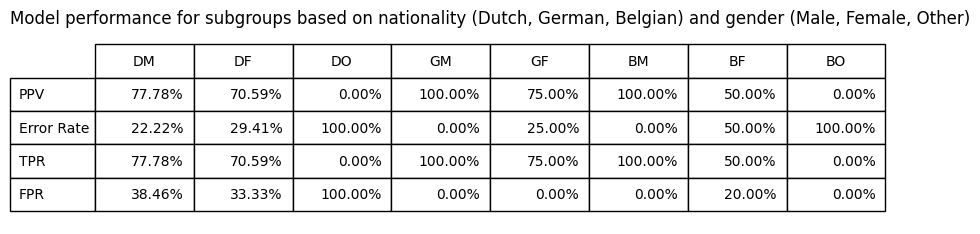

In [85]:
## Table 1.1: PPV, Error Rate, TPR & FPR on different subgroups (gender, nationality)


# Some things for the table

columns = ["DM", "DF", "DO", "GM", "GF", "GO", "BM", "BF", "BO"]
rows = ["PPV", "Error Rate", "TPR", "FPR"]


# Getting the data to fill in the table

data = [[],[],[],[]]
index = 0
for nationality in ["Dutch", "German", "Belgian"]:
    for gender in ["male", "female", "other"]:
        # getting the subgroup
        subgroup = X_test[(X_test['nationality'] == nationality) & (X_test['gender'] == gender)]
        if len(subgroup) == 0:
            columns.pop(index)
            index -= 1
        else:
            # PPV = Positive Prediction Rate
            if len(subgroup[subgroup["real"] == True]) == 0:
                PPV = 0.0
            else:
                PPV = len(subgroup[(subgroup["real"] == True) & (subgroup["decision-tree"] == True)]) / len(subgroup[subgroup["real"] == True])
            PPV *= 100
            data[0].append(PPV)
            # Error Rate = 100 - PPV
            data[1].append(100 - PPV)
            # TPR = True Positive Rate
            TP = len(subgroup[(subgroup["real"] == True) & (subgroup["decision-tree"] == True)])
            FN = len(subgroup[(subgroup["real"] == True) & (subgroup["decision-tree"] == False)])
            TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
            TPR *= 100
            data[2].append(TPR)
            # FPR = False Positive Rate
            FP = len(subgroup[(subgroup["real"] == False) & (subgroup["decision-tree"] == True)])
            TN = len(subgroup[(subgroup["real"] == False) & (subgroup["decision-tree"] == False)])
            FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
            FPR *= 100
            data[3].append(FPR)
        index += 1

        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}%' for x in row])

    
# The Table

plt.figure(figsize = [6.8, 2.5])
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1.5, 2)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.title("Model performance for subgroups based on nationality (Dutch, German, Belgian) and gender (Male, Female, Other)")
plt.show()

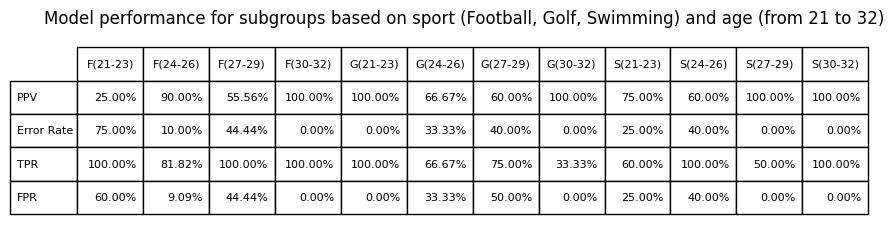

In [84]:
## Table 1.2: PPV, Error Rate, TPR & FPR on sport & age subgroups:


# Some things for the table

sports = ["Football", "Golf", "Swimming"]
sports_formatted = ["F", "G", "S"]
age_groups = ["(20, 23]", "(23, 26]", "(26, 29]", "(29, 32]"]
ages_formatted = ["(21-23)", "(24-26)", "(27-29)","(30-32)"]

columns = []
for s in sports_formatted:
    for a in ages_formatted:
        columns.append(f"{s}{a}")
rows = ["PPV", "Error Rate", "TPR", "FPR"]


# Getting the data to fill in the table

index = 0
data = [[],[],[],[]]
for s in sports:
    for a in age_groups:
        # getting the subgroup
        subgroup = X_test[(X_test['sport'] == s) & (X_test['age group'] == a)]
        if len(subgroup) == 0:
            columns.pop(index)
            index -= 1
        else:
            # True/False Positives/Negatives
            TP = len(subgroup[(subgroup["real"] == True) & (subgroup["decision-tree"] == True)])
            FP = len(subgroup[(subgroup["real"] == False) & (subgroup["decision-tree"] == True)])
            FN = len(subgroup[(subgroup["real"] == True) & (subgroup["decision-tree"] == False)])
            TN = len(subgroup[(subgroup["real"] == False) & (subgroup["decision-tree"] == False)])
            # PPV = Positive Prediction Rate
            PPV = 0.0 if TP + FP == 0 else TP / (TP + FP)
            PPV *= 100
            data[0].append(PPV)
            # Error Rate = 100 - PPV
            data[1].append(100 - PPV)
            # TPR = True Positive Rate
            TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
            TPR *= 100
            data[2].append(TPR)
            # FPR = False Positive Rate
            FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
            FPR *= 100
            data[3].append(FPR)
        index += 1
        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}%' for x in row])

    
# The Table

plt.figure(figsize = [6.8, 2.5])
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1.5, 2)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on sport (Football, Golf, Swimming) and age (from 21 to 32)")
plt.show()

*1.2. Model vs Real Hiring Probability Bar Charts*

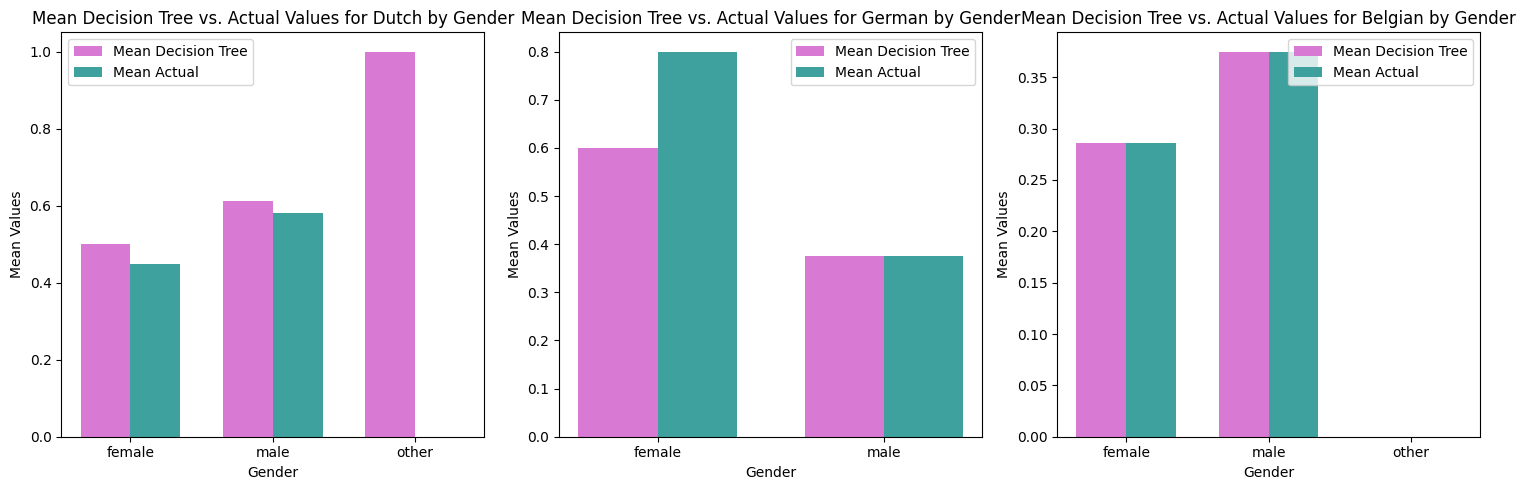

In [86]:
## Bar Chart 1.1: Real vs Predicted Hiring Probability of nationality & gender

# List of nationalities to plot
nationalities_to_plot = ['Dutch', 'German', 'Belgian']

# Create subplots with three columns (one for each nationality)
fig, axs = plt.subplots(1, len(nationalities_to_plot), figsize=(15, 5))

# Set the width of the bars
bar_width = 0.35

# Define colors
actual_color = '#3EA19E'
predicted_color = '#D87AD3'

# Iterate through the nationalities and create a subplot for each
for i, nationality in enumerate(nationalities_to_plot):
    # Group by gender and nationality, and calculate the mean of predicted and actual values
    predicted_mean = X_test.groupby(['gender', 'nationality'])['decision-tree'].mean().reset_index()
    real_mean = X_test.groupby(['gender', 'nationality'])['real'].mean().reset_index()

    # Filter data to include only the current nationality
    predicted_mean_nat = predicted_mean[predicted_mean['nationality'] == nationality]
    real_mean_nat = real_mean[real_mean['nationality'] == nationality]

    # Create an array of indices for the x-axis
    indices = range(len(predicted_mean_nat))

    # Create bars for mean predicted values with the specified color
    axs[i].bar(indices, predicted_mean_nat['decision-tree'], bar_width, label='Mean Decision Tree', color=predicted_color)

    # Create bars for mean actual values with the specified color
    axs[i].bar([idx + bar_width for idx in indices], real_mean_nat['real'], bar_width, label='Mean Actual', color=actual_color)

    # Set labels, title, and legend for the current subplot
    axs[i].set_xlabel('Gender')
    axs[i].set_ylabel('Mean Values')
    axs[i].set_title(f'Mean Decision Tree vs. Actual Values for {nationality} by Gender')
    axs[i].set_xticks([idx + bar_width / 2 for idx in indices])
    axs[i].set_xticklabels(predicted_mean_nat['gender'])
    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

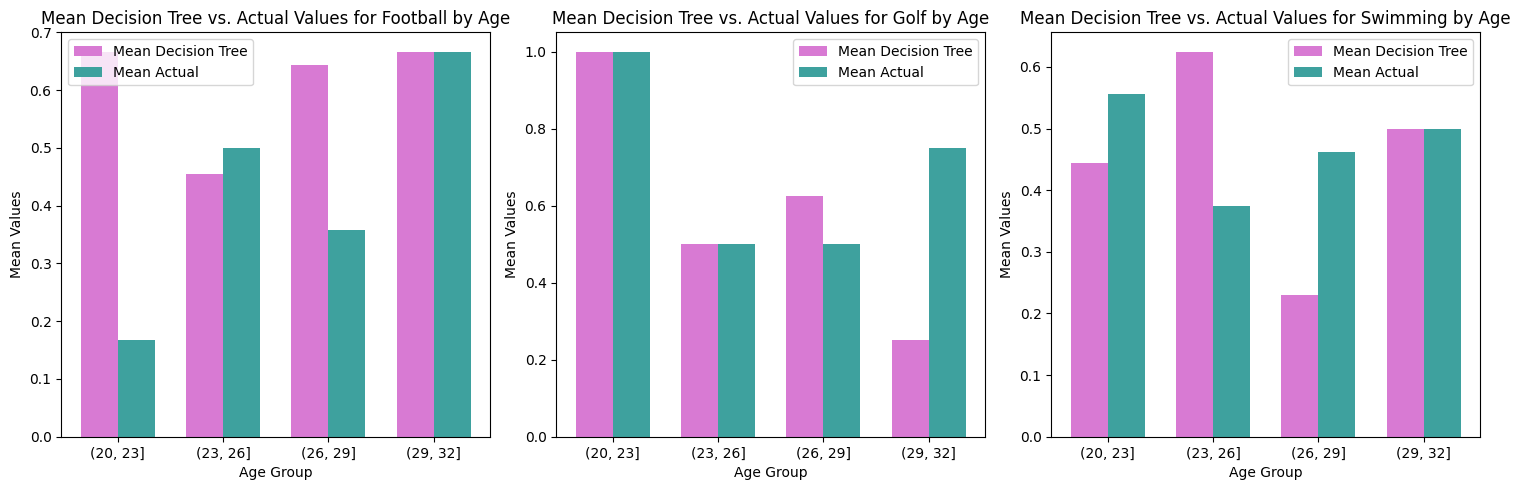

In [88]:
## Bar Chart 1.2: Real vs Predicted Hiring Probability of sports & age subgroups

# List of sports to plot
sports_to_plot = ['Football', 'Golf', 'Swimming']

# Create subplots with three columns (one for each sport)
fig, axs = plt.subplots(1, len(sports_to_plot), figsize=(15, 5))

# Set the width of the bars
bar_width = 0.35

# Define colors
actual_color = '#3EA19E'
predicted_color = '#D87AD3'

# Iterate through the sports and create a subplot for each
for i, sport in enumerate(sports_to_plot):
    # Group by age and sport, and calculate the mean of predicted and actual values
    predicted_mean = X_test.groupby(['age group', 'sport'])['decision-tree'].mean().reset_index()
    real_mean = X_test.groupby(['age group', 'sport'])['real'].mean().reset_index()

    # Filter data to include only the current sport
    predicted_mean_sport = predicted_mean[predicted_mean['sport'] == sport]
    real_mean_sport = real_mean[real_mean['sport'] == sport]

    # Create an array of indices for the x-axis
    indices = range(len(predicted_mean_sport))

    # Create bars for mean predicted values with the specified color
    axs[i].bar(indices, predicted_mean_sport['decision-tree'], bar_width, label='Mean Decision Tree', color=predicted_color)

    # Create bars for mean actual values with the specified color
    axs[i].bar([idx + bar_width for idx in indices], real_mean_sport['real'], bar_width, label='Mean Actual', color=actual_color)

    # Set labels, title, and legend for the current subplot
    axs[i].set_xlabel('Age Group')
    axs[i].set_ylabel('Mean Values')
    axs[i].set_title(f'Mean Decision Tree vs. Actual Values for {sport} by Age')
    axs[i].set_xticks([idx + bar_width / 2 for idx in indices])
    axs[i].set_xticklabels(predicted_mean_sport['age group'])
    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Final Model Exploration for the Logistic Regression model**

**Final Model Exploration for the SVM model**